In [119]:
%matplotlib inline
import csv
import ast

import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor


In [120]:
with open("AmesHousing.csv") as f:
    raw_data = np.array(list(csv.reader(f,delimiter=",")))
    raw_data[0,0] = 'Order'
    print(raw_data[:2,]) # = 'Order'
  
    att_type = []
    for i in range(0,len(raw_data[1,:])):
        #print(type(raw_data[1][i]))
        try:
            att_type.append(type(ast.literal_eval(raw_data[1,i])))
            
        except ValueError:
            #print("Valerror: %s" %raw_data[1][i])
            att_type.append(type('s'))
        except SyntaxError:
           # print("Synerror: %s" %raw_data[1][i])
            att_type.append(type('s'))
    
    print(att_type)
            

[['Order' 'PID' 'MS SubClass' 'MS Zoning' 'Lot Frontage' 'Lot Area'
  'Street' 'Alley' 'Lot Shape' 'Land Contour' 'Utilities' 'Lot Config'
  'Land Slope' 'Neighborhood' 'Condition 1' 'Condition 2' 'Bldg Type'
  'House Style' 'Overall Qual' 'Overall Cond' 'Year Built' 'Year Remod/Add'
  'Roof Style' 'Roof Matl' 'Exterior 1st' 'Exterior 2nd' 'Mas Vnr Type'
  'Mas Vnr Area' 'Exter Qual' 'Exter Cond' 'Foundation' 'Bsmt Qual'
  'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1'
  'BsmtFin Type 2' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' 'Heating'
  'Heating QC' 'Central Air' 'Electrical' '1st Flr SF' '2nd Flr SF'
  'Low Qual Fin SF' 'Gr Liv Area' 'Bsmt Full Bath' 'Bsmt Half Bath'
  'Full Bath' 'Half Bath' 'Bedroom AbvGr' 'Kitchen AbvGr' 'Kitchen Qual'
  'TotRms AbvGrd' 'Functional' 'Fireplaces' 'Fireplace Qu' 'Garage Type'
  'Garage Yr Blt' 'Garage Finish' 'Garage Cars' 'Garage Area' 'Garage Qual'
  'Garage Cond' 'Paved Drive' 'Wood Deck SF' 'Open Porch SF'
  'Enclosed Porch' '

In [141]:
num_data = []
num_data_cols = []
num_data_headings = []
for i in range(0,len(raw_data[:,1])):
    num_data.append([])
    for j in range(0,len(raw_data[1,:])):
        if att_type[j] == type(1):
            #print(raw_data[i,j])
            if i == 0:
                num_data_headings.append(raw_data[i,j])
            else:
                try:
                    num_data[i].append(int(raw_data[i,j]))
                except TypeError:
                   # print("TypeErro: %s, %s" %(raw_data[i,j],type(raw_data[i,j])))
                    num_data[i].append(-1)
                except ValueError:
                    #print("TypeErro: %s,  %s" %(raw_data[i,j],type(raw_data[i,j])))
                    num_data[i].append(-1)


num_data_headings = np.array(num_data_headings)
num_data = np.array(num_data[1:][:]).astype(float)
num_data_cols = num_data.transpose()
#print(num_data_headings)
print(num_data_cols)
#print(num_data)
#np.shape(num_data)
np.shape(num_data_cols)

[[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   2.92800000e+03
    2.92900000e+03   2.93000000e+03]
 [  1.41000000e+02   8.00000000e+01   8.10000000e+01 ...,   6.20000000e+01
    7.70000000e+01   7.40000000e+01]
 [  3.17700000e+04   1.16220000e+04   1.42670000e+04 ...,   1.04410000e+04
    1.00100000e+04   9.62700000e+03]
 ..., 
 [  5.00000000e+00   6.00000000e+00   6.00000000e+00 ...,   7.00000000e+00
    4.00000000e+00   1.10000000e+01]
 [  2.01000000e+03   2.01000000e+03   2.01000000e+03 ...,   2.00600000e+03
    2.00600000e+03   2.00600000e+03]
 [  2.15000000e+05   1.05000000e+05   1.72000000e+05 ...,   1.32000000e+05
    1.70000000e+05   1.88000000e+05]]


(37, 2930)

In [142]:
corrmat = np.corrcoef(num_data_cols)
print(corrmat)

[[ 1.          0.00885731  0.03135406 ...,  0.13336528 -0.9759929
  -0.03140793]
 [ 0.00885731  1.          0.13432098 ...,  0.01736448 -0.01174177
   0.19993458]
 [ 0.03135406  0.13432098  1.         ...,  0.00385859 -0.02308509
   0.26654922]
 ..., 
 [ 0.13336528  0.01736448  0.00385859 ...,  1.         -0.15555424
   0.03525884]
 [-0.9759929  -0.01174177 -0.02308509 ..., -0.15555424  1.         -0.03056909]
 [-0.03140793  0.19993458  0.26654922 ...,  0.03525884 -0.03056909  1.        ]]


The plot below is just the correlation between the attributes that have numerical values.
So far it looks like the attrubutes that correlate to sale price the most strongly are Overall Quality, Year Built, Year Remod/Add, Mas Vnr Area, Total Basement SF, 1st Floor SF, Gr Living Area, Garage Cars and Garage Area. Since basement SF and 1st floor SF are closely correlated, as well as Garage Cars and Garage Area, we can probably just one of those two pairs.

0: Order
1: Lot Frontage
2: Lot Area
3: Overall Qual
4: Overall Cond
5: Year Built
6: Year Remod/Add
7: Mas Vnr Area
8: BsmtFin SF 1
9: BsmtFin SF 2
10: Bsmt Unf SF
11: Total Bsmt SF
12: 1st Flr SF
13: 2nd Flr SF
14: Low Qual Fin SF
15: Gr Liv Area
16: Bsmt Full Bath
17: Bsmt Half Bath
18: Full Bath
19: Half Bath
20: Bedroom AbvGr
21: Kitchen AbvGr
22: TotRms AbvGrd
23: Fireplaces
24: Garage Yr Blt
25: Garage Cars
26: Garage Area
27: Wood Deck SF
28: Open Porch SF
29: Enclosed Porch
30: 3Ssn Porch
31: Screen Porch
32: Pool Area
33: Misc Val
34: Mo Sold
35: Yr Sold
36: SalePrice


(37,)

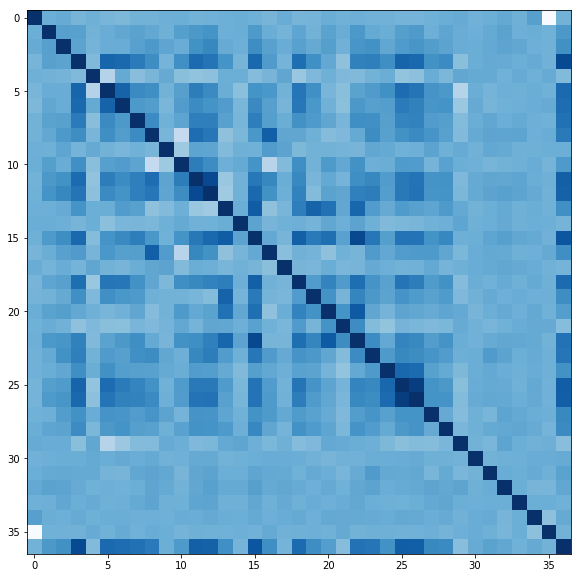

In [176]:
np.shape(corrmat)

#plt.matshow(corrmat)
plt.figure(figsize=(10,10))
plt.imshow(corrmat, cmap="Blues")
#plt.matshow(corrmat)
#plt.show()
for i in range(0,len(num_data_headings)):
    print("%d: %s" %(i, num_data_headings[i]))
#print(np.array(num_data_headings[:]).transpose())
np.shape(num_data_headings)